<a href="https://colab.research.google.com/github/angelohafner/linguagem-de-programacao-udesc/blob/main/quiver_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Quiver Plots with Matplotlib

Focado **apenas** em gráficos quiver.

> Observação: comentários de código em inglês.

## Setup
Importe bibliotecas e crie uma malha 2D.

In [1]:

# Basic imports
import numpy as np
import matplotlib.pyplot as plt

# Grid generation
x = np.linspace(-3.0, 3.0, 21)
y = np.linspace(-3.0, 3.0, 21)
X, Y = np.meshgrid(x, y)

def finish_axes(title):
    # Helper to standardize the axes
    plt.gca().set_aspect("equal", adjustable="box")
    plt.xlim(x.min(), x.max())
    plt.ylim(y.min(), y.max())
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.grid(True, linewidth=0.5, alpha=0.3)


## Exemplo 1 — Campo constante

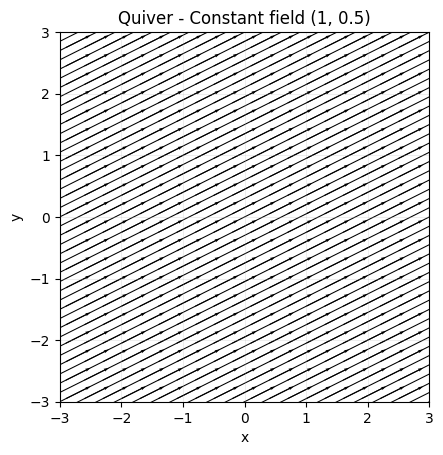

In [2]:

# Field: constant vector (1, 0.5)
U = np.ones_like(X) * 1.0
V = np.ones_like(Y) * 0.5

plt.figure()
plt.quiver(X, Y, U, V, angles="xy", scale_units="xy", scale=1.0, pivot="mid")
finish_axes("Quiver - Constant field (1, 0.5)")
plt.show()


## Exemplo 2 — Campo radial (sem normalização)

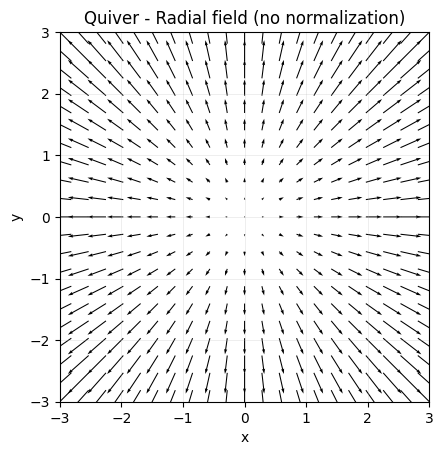

In [3]:

# Field: radial from origin -> (U, V) = (X, Y)
U = X
V = Y

plt.figure()
plt.quiver(X, Y, U, V, angles="xy", scale_units="xy", scale=8.0, pivot="mid")
finish_axes("Quiver - Radial field (no normalization)")
plt.show()


## Exemplo 3 — Normalização de vetores

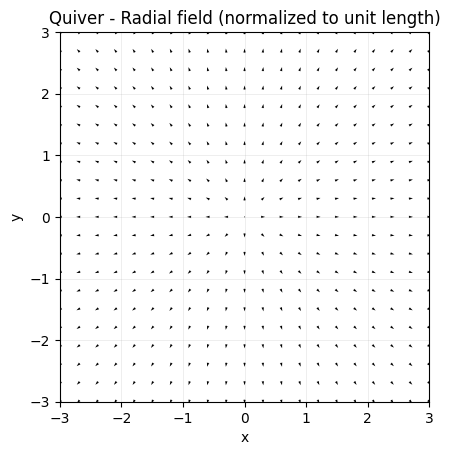

In [4]:

# Normalize each vector to unit length
U = X
V = Y
mag = np.hypot(U, V)  # Vector magnitude
eps = 1e-9            # Avoid division by zero
U_norm = U / (mag + eps)
V_norm = V / (mag + eps)

plt.figure()
plt.quiver(X, Y, U_norm, V_norm, angles="xy", scale_units="xy", scale=15.0, pivot="mid")
finish_axes("Quiver - Radial field (normalized to unit length)")
plt.show()


## Exemplo 4 — Cores pela magnitude

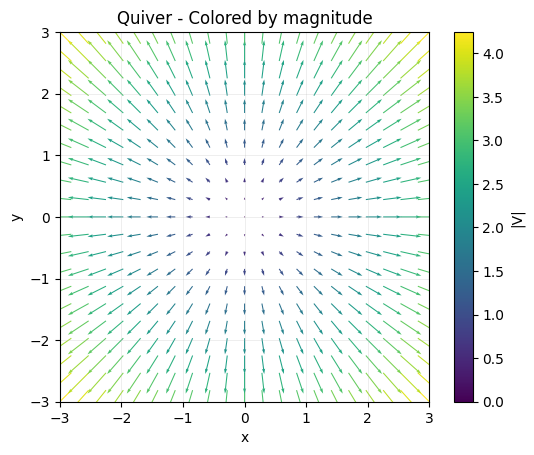

In [5]:

# Color by magnitude of the unnormalized field
U = X
V = Y
C = np.hypot(U, V)  # Use magnitude as color

plt.figure()
q = plt.quiver(X, Y, U, V, C, cmap="viridis", angles="xy", scale_units="xy", scale=8.0, pivot="mid")
finish_axes("Quiver - Colored by magnitude")
plt.colorbar(q, label="|V|")
plt.show()


## Aplicação física A — Campo elétrico de carga pontual (+q na origem)

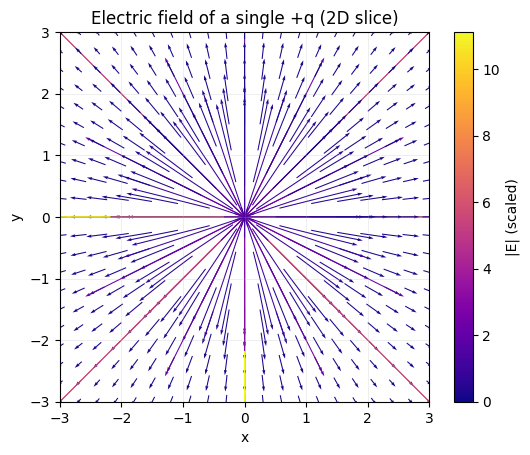

In [6]:

# Physical example: electric field of a single positive point charge at origin
k = 1.0   # Coulomb constant scaled for visualization
q = 1.0   # Positive charge
eps = 1e-6

Rx = X
Ry = Y
r2 = Rx**2 + Ry**2
r32 = (r2 + eps)**1.5  # |r|^3 with small epsilon

Ex = k * q * Rx / r32
Ey = k * q * Ry / r32
Emag = np.hypot(Ex, Ey)

plt.figure()
qv = plt.quiver(X, Y, Ex, Ey, Emag, cmap="plasma", angles="xy", scale_units="xy", scale=0.5, pivot="mid")
finish_axes("Electric field of a single +q (2D slice)")
plt.colorbar(qv, label="|E| (scaled)")
plt.show()


## Aplicação física B — Campo de velocidades tipo vórtice (opcional)

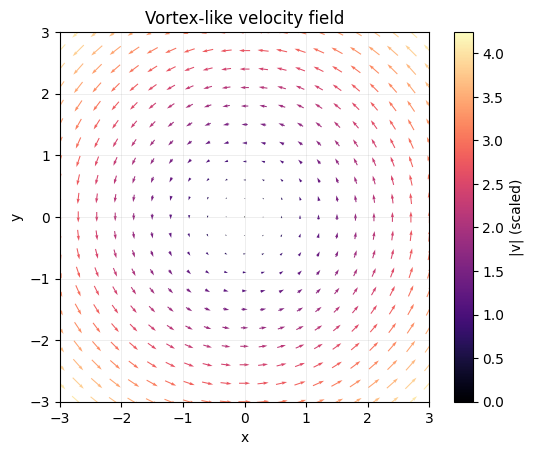

In [7]:

# Rotational flow (vortex-like): v = w * (-y, x)
w = 1.0
U = -w * Y
V =  w * X
C = np.hypot(U, V)

plt.figure()
q = plt.quiver(X, Y, U, V, C, cmap="magma", angles="xy", scale_units="xy", scale=15.0, pivot="mid")
finish_axes("Vortex-like velocity field")
plt.colorbar(q, label="|v| (scaled)")
plt.show()


## Exercício resolvido — Dipolo elétrico (+q e −q)

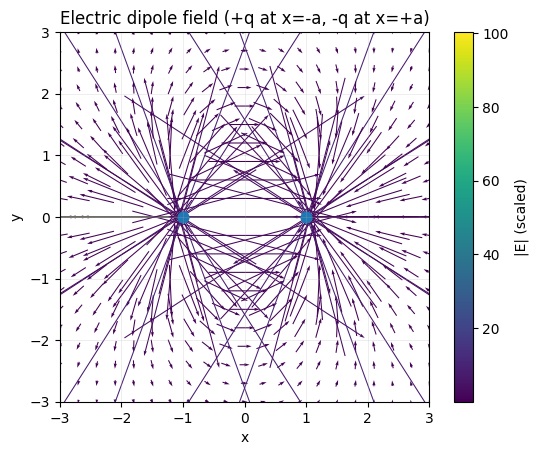

In [8]:

# Electric dipole at (-a, 0) with +q and at (+a, 0) with -q
a = 1.0
q1 = +1.0
q2 = -1.0
k = 1.0
eps = 1e-6

# Vectors from charges to grid points
Rx1 = X - (-a)
Ry1 = Y - 0.0
r2_1 = Rx1**2 + Ry1**2
r32_1 = (r2_1 + eps)**1.5

Rx2 = X - (+a)
Ry2 = Y - 0.0
r2_2 = Rx2**2 + Ry2**2
r32_2 = (r2_2 + eps)**1.5

# Field contributions
E1x = k * q1 * Rx1 / r32_1
E1y = k * q1 * Ry1 / r32_1
E2x = k * q2 * Rx2 / r32_2
E2y = k * q2 * Ry2 / r32_2

Ex = E1x + E2x
Ey = E1y + E2y
Emag = np.hypot(Ex, Ey)

plt.figure()
qv = plt.quiver(X, Y, Ex, Ey, Emag, cmap="viridis", angles="xy", scale_units="xy", scale=0.7, pivot="mid")
finish_axes("Electric dipole field (+q at x=-a, -q at x=+a)")
plt.scatter([-a, +a], [0.0, 0.0], s=60)  # Charges markers
plt.colorbar(qv, label="|E| (scaled)")
plt.show()



## Exercícios propostos
1. **Gradiente de um potencial**: Defina \( \phi(x,y) = \ln(\sqrt{x^2+y^2}+\varepsilon) \). Plote \(\vec{E} = -\nabla \phi\) com quiver; normalize e pinte por magnitude.
2. **Fonte-sumidouro**: Campo \(\vec{v} = \alpha (x, y) - \beta (x - x_0, y - y_0)\). Ajuste \(\alpha,\beta,x_0,y_0\) e analise o padrão.
3. **Cisalhamento**: \(\vec{v} = (k y, 0)\). Mostre a versão normalizada e discuta como `scale` muda a legibilidade.
